In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | solok
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | zhuhai
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | marcona
City not found. Skipping...
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | roma
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | port moresby
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | juneau
Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | hindupur
Processing Record 43 of Set 4 | tuy hoa
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | namatanai
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | orlik
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | bud
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | najran
Processing Record 3 of Set 5 | boyolangu
Processing Record 4 of Set 5 | bam
Processing Record 5 of Set 5 | ambulu
Processing Record 6 of Set 5 | alice springs
Processing Record 7 of Set 5 | kyshtovka
Processing Record 8 of Set 5 | russell
Processing Record 9 of Set 5 | srednekolymsk
Processing Record 10 of Set 5 | aykhal
Processing Record 11 of Set 5 | hargeysa
Processing Record 12 of Set 5 |

Processing Record 28 of Set 8 | kavieng
Processing Record 29 of Set 8 | penzance
Processing Record 30 of Set 8 | umea
Processing Record 31 of Set 8 | harlingen
Processing Record 32 of Set 8 | kapit
Processing Record 33 of Set 8 | villa union
Processing Record 34 of Set 8 | palana
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | conceicao do araguaia
Processing Record 37 of Set 8 | tiznit
Processing Record 38 of Set 8 | sfantu gheorghe
Processing Record 39 of Set 8 | port lincoln
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | banapur
Processing Record 42 of Set 8 | tarudant
City not found. Skipping...
Processing Record 43 of Set 8 | boa vista
Processing Record 44 of Set 8 | sokolovo
Processing Record 45 of Set 8 | fort nelson
Processing Record 46 of Set 8 | baillif
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | tezu
Processing Record 49 of Set 8 | redcar
Processing Record 50 of Set 8 | kulhudhuffushi

Processing Record 13 of Set 12 | baykit
Processing Record 14 of Set 12 | saint-leu
Processing Record 15 of Set 12 | vestmannaeyjar
Processing Record 16 of Set 12 | maghama
City not found. Skipping...
Processing Record 17 of Set 12 | kudahuvadhoo
Processing Record 18 of Set 12 | limoges
Processing Record 19 of Set 12 | teruel
Processing Record 20 of Set 12 | nouakchott
Processing Record 21 of Set 12 | vredendal
Processing Record 22 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 23 of Set 12 | kem
Processing Record 24 of Set 12 | brest
Processing Record 25 of Set 12 | cabedelo
Processing Record 26 of Set 12 | villeneuve-sur-lot
Processing Record 27 of Set 12 | yerofey pavlovich
Processing Record 28 of Set 12 | san jose
Processing Record 29 of Set 12 | warqla
City not found. Skipping...
Processing Record 30 of Set 12 | proddatur
Processing Record 31 of Set 12 | davila
Processing Record 32 of Set 12 | antofagasta
Processing Record 33 of Set 12 | mangai
Processing Record

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]


In [18]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Solok,ID,2021-06-05 20:28:31,-0.7918,100.6593,68.50,87,4,2.30
1,Hasaki,JP,2021-06-05 20:28:31,35.7333,140.8333,66.60,82,100,9.35
2,Albany,US,2021-06-05 20:28:32,42.6001,-73.9662,91.45,44,47,1.01
3,Zhuhai,CN,2021-06-05 20:28:32,22.2769,113.5678,81.05,83,20,3.00
4,Kavaratti,IN,2021-06-05 20:28:32,10.5669,72.6420,82.42,76,100,13.62


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import time module
import time


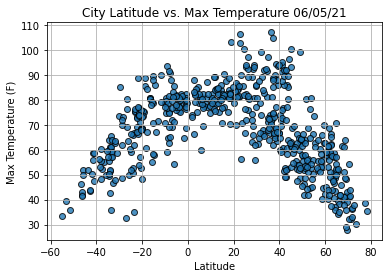

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

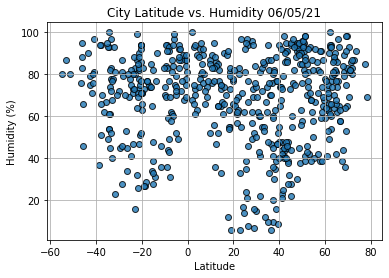

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


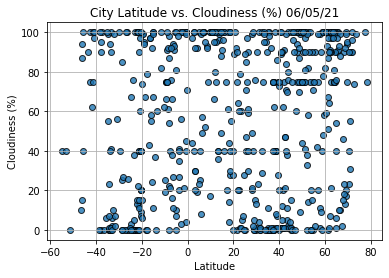

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

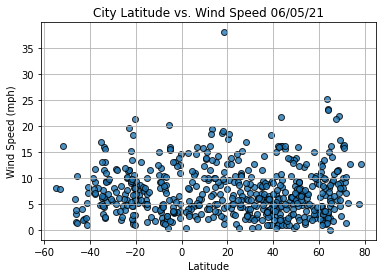

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

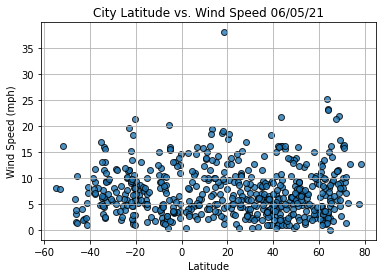

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [35]:
# Import dependencies
from scipy.stats import linregress

In [49]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [51]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2021-06-05 20:28:36
Lat                      -42.8794
Lng                      147.3294
Max Temp                    43.92
Humidity                       79
Cloudiness                     75
Wind Speed                   1.99
Name: 13, dtype: object

In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

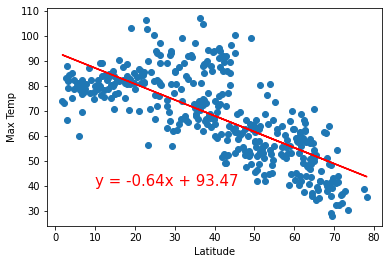

In [77]:
# Linear regression for Max Temp on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

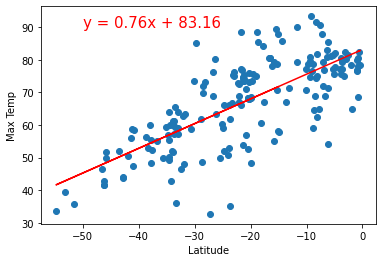

In [76]:
# Linear regression for Max Temp on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

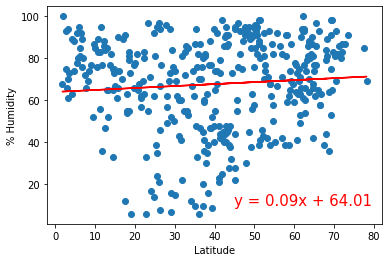

In [89]:
# Linear regression for Humidity on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

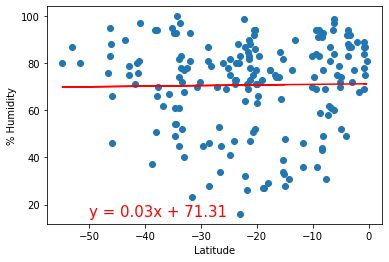

In [93]:
# Linear regression for Humidity on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

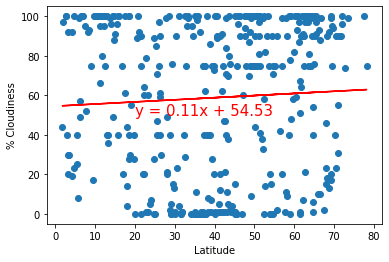

In [103]:
# Linear regression for Cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20, 50))

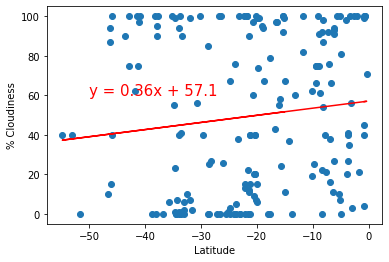

In [101]:
# Linear regression for Cloudiness on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

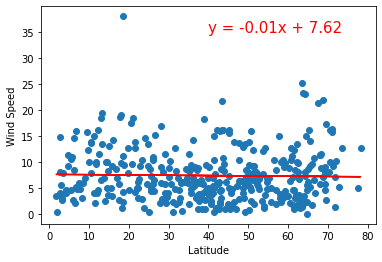

In [109]:
# Linear regression for Wind Speed on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


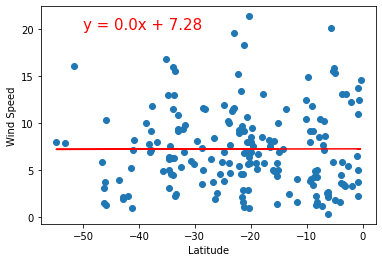

In [111]:
# Linear regression for Wind Speed on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))